<Figure size 1000x800 with 0 Axes>

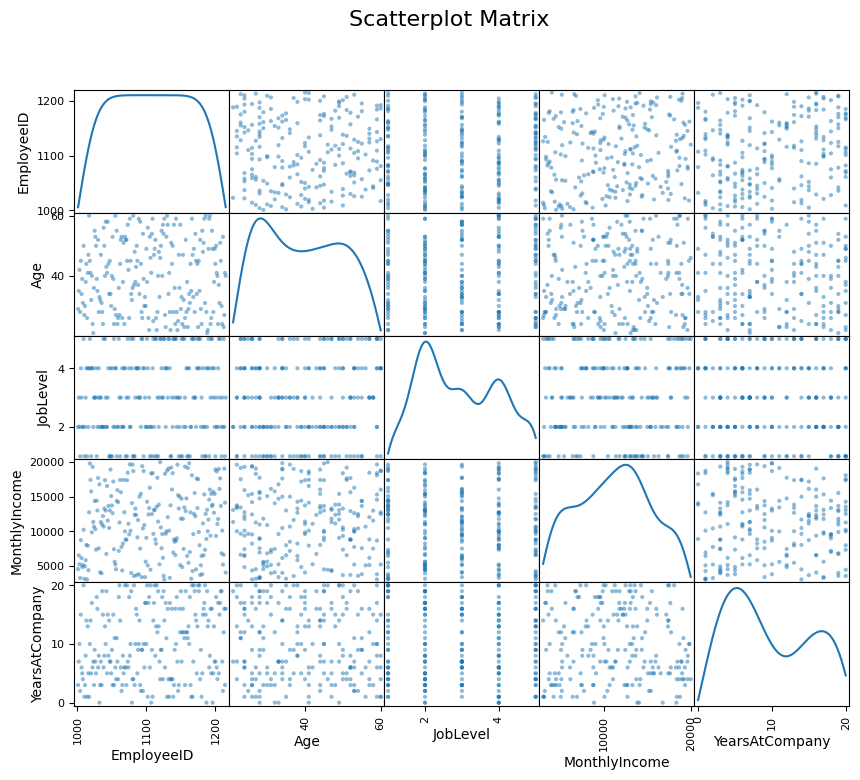

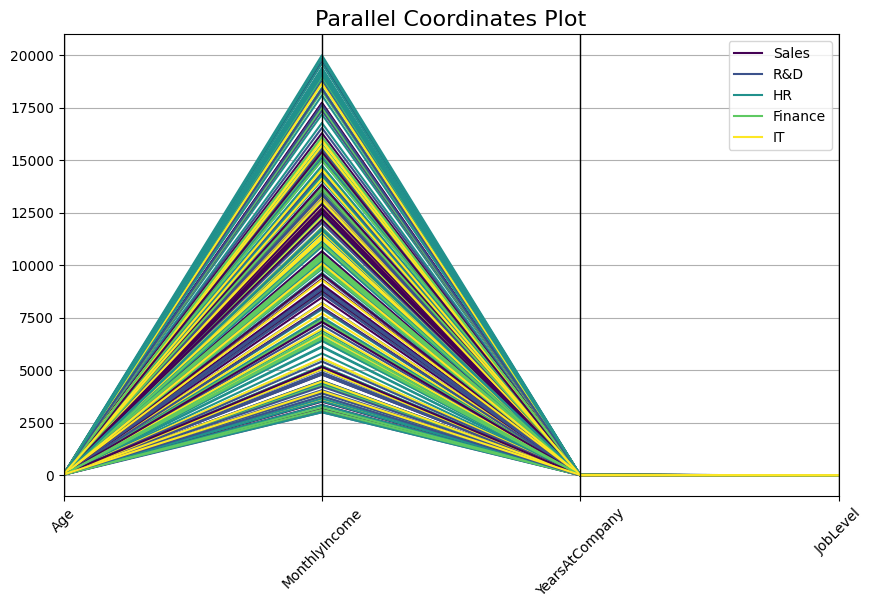

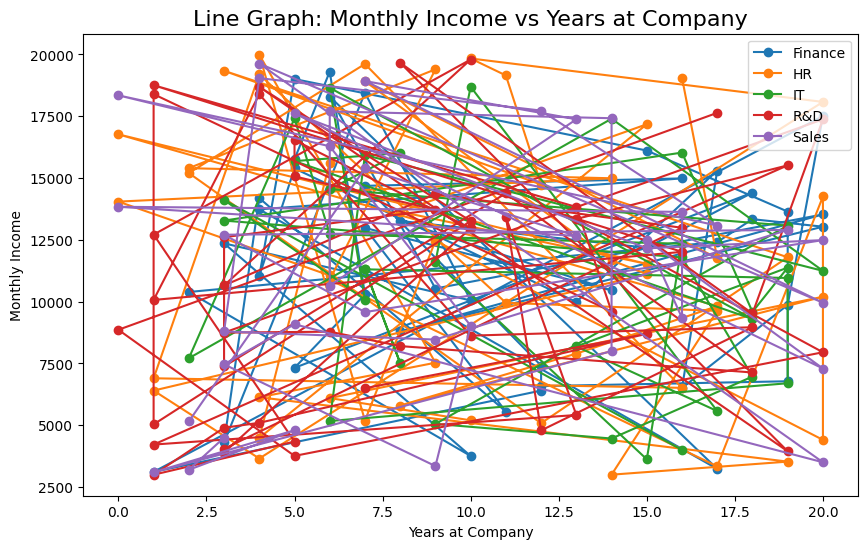

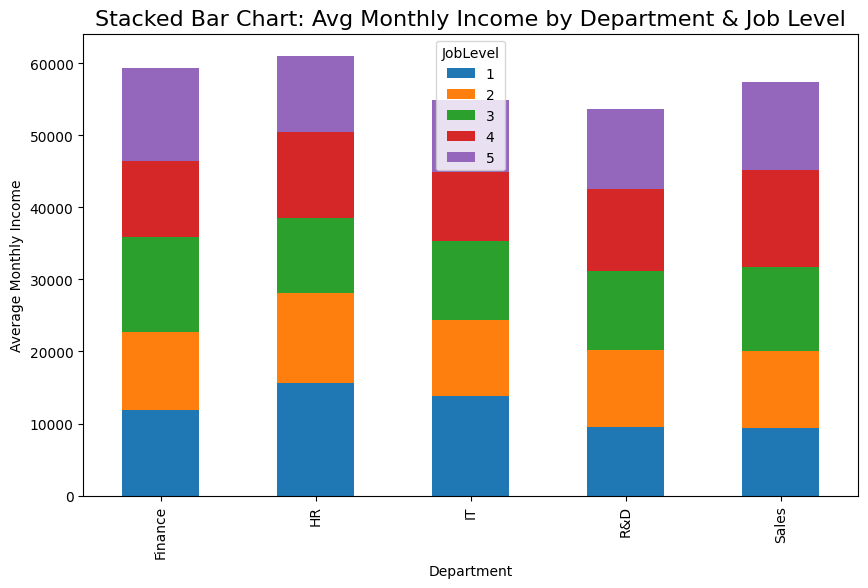

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix, parallel_coordinates

file_path = 'updated_employee_records_no_name.csv'
df = pd.read_csv(file_path)

# Remove "Name" column if still present
if 'Name' in df.columns:
    df = df.drop(columns=['Name'])

# 1. Scatterplot Matrix

numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 8))
scatter_matrix(df[numeric_cols], figsize=(10, 8), diagonal='kde')
plt.suptitle("Scatterplot Matrix", fontsize=16)
plt.show()

# 2. Parallel Coordinates

plt.figure(figsize=(10, 6))
parallel_coordinates(df[['Department', 'Age', 'MonthlyIncome', 'YearsAtCompany', 'JobLevel']],
                     'Department', colormap='viridis')
plt.title("Parallel Coordinates Plot", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# 3. Line Graph

plt.figure(figsize=(10, 6))
for dept, group_data in df.groupby('Department'):
    plt.plot(group_data['YearsAtCompany'],
             group_data['MonthlyIncome'],
             marker='o',
             label=dept)
plt.title("Line Graph: Monthly Income vs Years at Company", fontsize=16)
plt.xlabel("Years at Company")
plt.ylabel("Monthly Income")
plt.legend()
plt.show()

# 4. Stacked Bar Chart

dept_income = df.groupby(['Department', 'JobLevel'])['MonthlyIncome'].mean().unstack()
dept_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Stacked Bar Chart: Avg Monthly Income by Department & Job Level", fontsize=16)
plt.ylabel("Average Monthly Income")
plt.xlabel("Department")
plt.show()
